##  Raaghav Radhakrishnan - 246097

### Exercise 1 - Part (a)

In [0]:
#import libraries
from pyspark import SparkContext
from pyspark.sql import SQLContext
import pandas as pd
from pyspark.sql import Row
import numpy as np

In [0]:
sc = SparkContext()
sqlContext = SQLContext(sc)


In [0]:
#List of words
a = ["spark","rdd","python","context","create","class"]
b = ["operation", "apache", "scala", "lambda","parallel","partition"]

#Making RDDs
rdd_A = sc.parallelize(a)
rdd_B= sc.parallelize(b)

#Mapping the names of RDD
A = rdd_A.map(lambda x: Row(name = x))
B = rdd_B.map(lambda x: Row(name = x))

#Creating dataframe from RDD
dfA = sqlContext.createDataFrame(A)
dfB = sqlContext.createDataFrame(B)

#Creating Alias
df1 = dfA.alias("df1")
df2 = dfB.alias("df2")

### Right outer join:
A RIGHT OUTER JOIN is one of the JOIN operations that allow you to specify a JOIN clause. It preserves the unmatched rows from the second (right) table, joining them with a NULL in the shape of the first (left) table.

In [35]:
#Right Outer Join
right_outer = df1.join(other=df2,on="name",how='right_outer')
print("Right Outer Join:")
right_outer.show()

Right Outer Join:
+---------+
|     name|
+---------+
|operation|
|   lambda|
|partition|
| parallel|
|    scala|
|   apache|
+---------+



### Full outer join:
A FULL OUTER JOIN combines the results of both left and right outer joins and returns all (matched or unmatched) rows from the tables on both sides of the join clause

In [36]:
#Full Outer Join
full_outer = df1.join(other=df2,on="name",how='full_outer')
print("Full Outer Join:")
full_outer.show()

Full Outer Join:
+---------+
|     name|
+---------+
|operation|
|   lambda|
|  context|
|partition|
|   create|
|      rdd|
| parallel|
|    scala|
|   apache|
|    spark|
|    class|
|   python|
+---------+



In [37]:
#Mapping the RDD
map_rdd = full_outer.rdd.map(lambda x: sum([word.count('s') for word in x]))
map_df = map_rdd.map(lambda x: Row(name = x))
map_df = sqlContext.createDataFrame(map_df)
print("Mapped Dataframe with count of 's'")
map_df.show()

#Reducing the RDD
reduce_rdd=map_rdd.reduce(lambda x,y: x+y)
print("Using Map-Reduce, the character \"s\" appears",reduce_rdd,"times in all 
                                                                  a and b.\n" )

Mapped Dataframe with count of 's'
+----+
|name|
+----+
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   0|
|   1|
|   0|
|   1|
|   2|
|   0|
+----+

Using Map-Reduce, the character "s" appears 4 times in all a and b.



In [38]:
#Aggregate function
count = full_outer.rdd.aggregate(0, lambda i, x: i + x[0].count('s'), 
                                 lambda i, j: i+j)
print("Using aggregate function, the character \"s\" appears",count,
      "times in all a and b." )


Using aggregate function, the character "s" appears 4 times in all a and b.


###  

 ###  

### Exercise 1 - Part (b)

In [31]:
json_file = "gdrive/My Drive/DDA/Spark1/students.json"
df = sqlContext.read.json(json_file)
print("Students records: \n")
df.show()

Students records: 

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|     null|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 1

In [32]:
from pyspark.sql.functions import mean,col
avg = df.select(mean(col('points')).alias('mean')).collect()
df = df.na.fill(avg[0]['mean'])
print("Replacing the null values in column points by mean of all points: \n")
df.show()

Replacing the null values in column points by mean of all points: 

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|     null|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Bro

In [33]:
df = df.na.fill({'dob':'unknown','last_name':'--'})
print("Replacing values in column dob and last_name by 'unknown' and '--': \n")
df.show()

Replacing values in column dob and last_name by 'unknown' and '--': 

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|       --|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   B

In [0]:
from pyspark.sql.functions import mean,col
avg = df.select(mean(col('points')).alias('mean')).collect()
df = df.na.fill({'dob':'January 20, 1995','last_name':'--'})

In [21]:
from dateutil import parser
import datetime
from pyspark.sql.types import TimestampType,DateType
from pyspark.sql.functions import UserDefinedFunction,col,date_format
udf = UserDefinedFunction(lambda x:parser.parse(x), TimestampType())
ts_df = df.withColumn("dob_timestamp",udf(df.dob))
func = UserDefinedFunction(lambda x: datetime.datetime
                           .strptime(str(x), '%Y-%m-%d %H:%M:%S'), 
                           TimestampType())

df_upd = ts_df.withColumn('dob', date_format(func(col('dob_timestamp')), 
                                             'dd-MM-yyyy'))
dd = df_upd.drop('dob_timestamp')
print("Dates changed to 'DD-MM-YYYY' format: \n")
dd.show()


Dates changed to 'DD-MM-YYYY' format: 

+------------------+----------+----------+---------+------+----+
|            course|       dob|first_name|last_name|points|s_id|
+------------------+----------+----------+---------+------+----+
|Humanities and Art|14-10-1983|      Alan|      Joe|    10|   1|
|  Computer Science|26-09-1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|12-06-1982|     Athur|   Watson|    16|   3|
|    Graphic Design|05-04-1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|01-11-1978|      Kira| Schommer|    11|   5|
|          Business|17-02-1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|01-01-1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|13-01-1978|      John|       --|    10|   8|
|  Machine Learning|26-12-1989|    Marcus|   Carson|    15|   9|
|           Physics|30-12-1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|12-06-1975|     Holly| Schwartz|    12|  11|
|  Computer Science|02-07-1985|     April|    Blac

In [22]:
from pyspark.sql.functions import lit,year
df_upd = df_upd.withColumn('age',2019 - year(col('dob_timestamp')))
df_upd = df_upd.drop('dob_timestamp')
print("Updated records with the current age of students: \n")
df_upd.show()

Updated records with the current age of students: 

+------------------+----------+----------+---------+------+----+---+
|            course|       dob|first_name|last_name|points|s_id|age|
+------------------+----------+----------+---------+------+----+---+
|Humanities and Art|14-10-1983|      Alan|      Joe|    10|   1| 36|
|  Computer Science|26-09-1980|    Martin|  Genberg|    17|   2| 39|
|    Graphic Design|12-06-1982|     Athur|   Watson|    16|   3| 37|
|    Graphic Design|05-04-1987|  Anabelle|  Sanberg|    12|   4| 32|
|        Psychology|01-11-1978|      Kira| Schommer|    11|   5| 41|
|          Business|17-02-1981| Christian|   Kiriam|    10|   6| 38|
|  Machine Learning|01-01-1984|   Barbara|  Ballard|    14|   7| 35|
|     Deep Learning|13-01-1978|      John|       --|    10|   8| 41|
|  Machine Learning|26-12-1989|    Marcus|   Carson|    15|   9| 30|
|           Physics|30-12-1987|     Marta|   Brooks|    11|  10| 32|
|    Data Analytics|12-06-1975|     Holly| Schwartz

In [23]:
from pyspark.sql.functions import stddev as std
from pyspark.sql.functions import when
sd = df.select(std(col('points')).alias('std')).collect()
sd = sd[0]['std']
df_pnt = df_upd.withColumn('points',when(df_upd.points >= sd+avg[0]['mean'],20)
                           .otherwise(df_upd.points))
print("Updated points using one standard deviation: \n")
df_pnt.show()

Updated points using one standard deviation: 

+------------------+----------+----------+---------+------+----+---+
|            course|       dob|first_name|last_name|points|s_id|age|
+------------------+----------+----------+---------+------+----+---+
|Humanities and Art|14-10-1983|      Alan|      Joe|    10|   1| 36|
|  Computer Science|26-09-1980|    Martin|  Genberg|    20|   2| 39|
|    Graphic Design|12-06-1982|     Athur|   Watson|    20|   3| 37|
|    Graphic Design|05-04-1987|  Anabelle|  Sanberg|    12|   4| 32|
|        Psychology|01-11-1978|      Kira| Schommer|    11|   5| 41|
|          Business|17-02-1981| Christian|   Kiriam|    10|   6| 38|
|  Machine Learning|01-01-1984|   Barbara|  Ballard|    14|   7| 35|
|     Deep Learning|13-01-1978|      John|       --|    10|   8| 41|
|  Machine Learning|26-12-1989|    Marcus|   Carson|    20|   9| 30|
|           Physics|30-12-1987|     Marta|   Brooks|    11|  10| 32|
|    Data Analytics|12-06-1975|     Holly| Schwartz|    

Histogram of new points: 



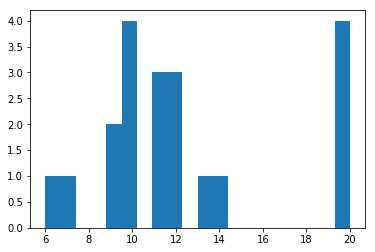

In [27]:
import matplotlib.pyplot as plt
pt = df_pnt.toPandas()['points']
print("Histogram of new points: \n")
plt.hist(pt,bins=20)
plt.show()

###  

###  

### Exercise 2

In [0]:
#import libraries
from pyspark import SparkContext
from pyspark.sql import SQLContext
import pandas as pd
from pyspark.sql import Row
import numpy as np
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType
from pyspark.sql import Window
from pyspark.sql.functions import mean as avg,stddev as stdd

In order to get the sessions of the user, the lags are found from which the 
difference in active time of the user is calculated. This is then checked if 
the user has exceeded 30 minutes are not. If yes, it's considered as timed-out 
session and if no, it's an active session

In [42]:
dat_file = "gdrive/My Drive/DDA/Spark1/tags.dat"

df = sqlContext.read.option("delimiter",":").csv(dat_file)
df = df.selectExpr("_c0 as UserID","_c2 as MovieID","_c4 as Tags",
                   "_c6 as Timestamp")
df = df.withColumn("UserID", df["UserID"].cast(IntegerType()))
df = df.withColumn("MovieID",df["MovieID"].cast(IntegerType()))
ts_w = Window.partitionBy("UserID").orderBy(asc("Timestamp"))
df = df.withColumn('lag',lag(df.Timestamp).over(ts_w))
df = df.withColumn('difference',when((df.Timestamp - df.lag)/60 < 30,1)
                   .otherwise(0))
df = df.withColumn('session',sum('difference').over(ts_w))
df = df.drop('lag','difference')
print("Tagging session for each user: \n")
df.show()

print("******************************************************\n\n")

df = df.withColumn('lag',lag(df.Timestamp).over(ts_w))
df = df.withColumn('difference',when((df.Timestamp - df.lag) > 30*60,1)
                   .otherwise(0))
df = df.withColumn('session',sum('difference').over(ts_w))
df = df.drop('lag','difference')

max_freq = df.groupBy("UserID").max("session")
max_freq = max_freq.orderBy('max(session)',ascending=False)
print("Frequency of tagging: \n")
max_freq.show()

print("******************************************************\n\n")

m = df.groupBy("UserID").mean("session").orderBy('avg(session)',
                                                 ascending=False)
print("Mean and Standard deviation of the tagging frequency of\neach user: \n")
sd = df.groupBy("UserID").agg(stddev("session"))

msd = m.join(sd,"UserID",how='right_outer').orderBy('avg(session)',
                                                    ascending=False)
msd.show()

print("******************************************************\n\n")

mean = df.agg(avg("session")).collect()[0]['avg(session)']
std = df.agg(stdd("session")).collect()[0]['stddev_samp(session)']
print("Mean and Standard deviation of the tagging frequency\nacross users: \n")
print("Mean: ",mean)
print("Standard Deviation: ",std)

print("******************************************************\n\n")
print("List of users with a mean tagging frequency within two\nstandard \
      deviation from the mean frequency for across users: \n")
m = m.withColumn("Flag",when(m['avg(session)'] < 2*std, 1).otherwise(0))
users_list = m.filter(m.Flag == 1).select('UserID').distinct()
users_list.show()

Tagging session for each user: 

+------+-------+----------------+----------+-------+
|UserID|MovieID|            Tags| Timestamp|session|
+------+-------+----------------+----------+-------+
|  6658|   2712|     unwatchable|1140486822|      0|
|  6658|    288|        annoying|1140486947|      1|
| 10817|    158| Christina Ricci|1218451667|      0|
| 10817|   3826|     Kevin Bacon|1218452067|      1|
| 10817|   3826|  elizabeth shue|1218452092|      2|
| 10817|   7451|   Lindsay Lohan|1218452569|      3|
| 10817|   1367|      glen close|1218466235|      3|
| 12046|   1610|        cold war|1222049475|      0|
| 12046|   1222|     Vietnam War|1222049571|      1|
| 12046|    750|     dark comedy|1226230439|      1|
| 12046|    750| Stanley Kubrick|1226230442|      2|
| 12046|    750|        cold war|1226230454|      3|
| 12046|    750|          satire|1226230466|      4|
| 12046|    778|    imdb top 250|1226230555|      5|
| 12046|    778|    black comedy|1226230582|      6|
| 12046|  487

###  

### Bonus

In [0]:
movies_dat_file = "gdrive/My Drive/DDA/Spark1/movies.dat"

df_movie = sqlContext.read.option("delimiter",":").csv(movies_dat_file)
df_movie= df_movie.selectExpr("_c0 as MovieID","_c2 as Title","_c4 as Genre")
df_movie.show()

ratings_dat_file = "gdrive/My Drive/DDA/Spark1/ratings.dat"

df_ratings = sqlContext.read.option("delimiter",":").csv(ratings_dat_file)
df_ratings = df_ratings.selectExpr("_c0 as UserID","_c2 as MovieID",
                                   "_c4 as Rating","_c6 as Timestamp")
df_ratings.show()

+-------+--------------------+--------------------+
|MovieID|               Title|               Genre|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Animation|Childre...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|        Comedy|Drama|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|Adventure|Children's|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|             Dracula|                null|
|     13|        Balto (1995)|Animation|Children's|
|     14|        Nixon (1995)|               Drama|
|     15|Cutthroat Island ...|Action|Adventure|...|
|     16|       Casino (1995)|      Drama|Thriller|
|     17|Sen

In [0]:
#Merging both the dataframes
merged = df_movie.join(df_ratings,'MovieID','inner')
merged.show()

+-------+--------------------+--------------------+------+------+---------+
|MovieID|               Title|               Genre|UserID|Rating|Timestamp|
+-------+--------------------+--------------------+------+------+---------+
|   1193|One Flew Over the...|               Drama|     1|     5|978300760|
|    661|James and the Gia...|Animation|Childre...|     1|     3|978302109|
|    914| My Fair Lady (1964)|     Musical|Romance|     1|     3|978301968|
|   3408|Erin Brockovich (...|               Drama|     1|     4|978300275|
|   2355|Bug's Life, A (1998)|Animation|Childre...|     1|     5|978824291|
|   1197|Princess Bride, T...|Action|Adventure|...|     1|     3|978302268|
|   1287|      Ben-Hur (1959)|Action|Adventure|...|     1|     5|978302039|
|   2804|Christmas Story, ...|        Comedy|Drama|     1|     5|978300719|
|    594|Snow White and th...|Animation|Childre...|     1|     4|978302268|
|    919|Wizard of Oz, The...|Adventure|Childre...|     1|     4|978301368|
|    595|Bea

In [0]:
columns_to_drop = ['MovieID', 'Genre','UserID','Timestamp']
test = merged.drop(*columns_to_drop)
test.show()

+--------------------+------+
|               Title|Rating|
+--------------------+------+
|One Flew Over the...|     5|
|James and the Gia...|     3|
| My Fair Lady (1964)|     3|
|Erin Brockovich (...|     4|
|Bug's Life, A (1998)|     5|
|Princess Bride, T...|     3|
|      Ben-Hur (1959)|     5|
|Christmas Story, ...|     5|
|Snow White and th...|     4|
|Wizard of Oz, The...|     4|
|Beauty and the Be...|     5|
|         Gigi (1958)|     4|
|Miracle on 34th S...|     4|
|Ferris Bueller's ...|     4|
|Sound of Music, T...|     5|
|    Airplane! (1980)|     4|
|       Tarzan (1999)|     3|
|        Bambi (1942)|     4|
|   Awakenings (1990)|     5|
|          Big (1988)|     4|
+--------------------+------+
only showing top 20 rows



In [0]:
test = test.withColumn("Rating", test["Rating"].cast(IntegerType()))
a = test.rdd.groupByKey().mapValues(lambda x: sum(x) / len(x))
c = sqlContext.createDataFrame(a).orderBy('_2',ascending = False)
c = c.filter(c._2 == 5.0)
c = c.selectExpr("_1 as MovieID","_2 as Avg_Rating")
print("Movies with maximum average rating: \n")
c.show()

Movies with maximum average rating: 

+--------------------+----------+
|             MovieID|Avg_Rating|
+--------------------+----------+
|Gate of Heavenly ...|       5.0|
|Smashing Time (1967)|       5.0|
|        Lured (1947)|       5.0|
|One Little Indian...|       5.0|
|    Baby, The (1973)|       5.0|
|Schlafes Bruder (...|       5.0|
|Follow the Bitch ...|       5.0|
|Bittersweet Motel...|       5.0|
|Ulysses (Ulisse) ...|       5.0|
|Song of Freedom (...|       5.0|
+--------------------+----------+



In [0]:
columns_to_drop = ['MovieID', 'Title','UserID','Timestamp']
test = merged.drop(*columns_to_drop)
test.show()

test = test.withColumn("Rating", test["Rating"].cast(IntegerType()))

+--------------------+------+
|               Genre|Rating|
+--------------------+------+
|               Drama|     5|
|Animation|Childre...|     3|
|     Musical|Romance|     3|
|               Drama|     4|
|Animation|Childre...|     5|
|Action|Adventure|...|     3|
|Action|Adventure|...|     5|
|        Comedy|Drama|     5|
|Animation|Childre...|     4|
|Adventure|Childre...|     4|
|Animation|Childre...|     5|
|             Musical|     4|
|               Drama|     4|
|              Comedy|     4|
|             Musical|     5|
|              Comedy|     4|
|Animation|Children's|     3|
|Animation|Children's|     4|
|               Drama|     5|
|      Comedy|Fantasy|     4|
+--------------------+------+
only showing top 20 rows



In [0]:
a = test.rdd.groupByKey().mapValues(lambda x: sum(x) / len(x))
c = sqlContext.createDataFrame(a).orderBy('_2',ascending = False)
c = c.selectExpr("_1 as Genre","_2 as Avg_Rating")
c.show()
maxx = c.rdd.max(key=lambda x:x[1])
print("Genre with maximum average rating: \n",maxx)

+--------------------+------------------+
|               Genre|        Avg_Rating|
+--------------------+------------------+
|Animation|Comedy|...| 4.473837209302325|
|   Film-Noir|Mystery| 4.367424242424242|
|       Adventure|War|  4.34610705596107|
|Film-Noir|Romance...|  4.29438202247191|
|    Film-Noir|Sci-Fi| 4.273333333333333|
|     Crime|Film-Noir| 4.264129181084199|
|           Film-Noir| 4.258104738154613|
|Action|Adventure|...| 4.251655629139073|
|Adventure|Childre...| 4.247962747380675|
|     Drama|Film-Noir| 4.218152866242038|
|  Film-Noir|Thriller| 4.206757438224912|
|Crime|Film-Noir|M...|4.2020547945205475|
|Comedy|Mystery|Ro...| 4.184158415841584|
|Comedy|Drama|Musical| 4.179785330948121|
|Comedy|Mystery|Th...| 4.168154761904762|
|  Action|Crime|Drama| 4.151277918489523|
|Action|Adventure|...| 4.147826086956521|
|Comedy|Drama|Western| 4.141263940520446|
|Crime|Film-Noir|M...| 4.126734158230221|
|Action|Sci-Fi|Thr...| 4.125824175824176|
+--------------------+------------

In [0]:
u_rat = merged.groupby('UserID').agg(countDistinct("MovieID"))
u_rat = u_rat.filter(u_rat['count(DISTINCT MovieID)'] > 40)
merged = merged.join(u_rat,"UserID","inner")
columns_to_drop = ['MovieID', 'Title','Genre','count(DISTINCT MovieID)',
                   'Timestamp']
test = merged.drop(*columns_to_drop)
test.show()

+------+------+
|UserID|Rating|
+------+------+
|  1090|     3|
|  1090|     3|
|  1090|     4|
|  1090|     3|
|  1090|     4|
|  1090|     4|
|  1090|     3|
|  1090|     3|
|  1090|     4|
|  1090|     3|
|  1090|     3|
|  1090|     3|
|  1090|     4|
|  1090|     2|
|  1090|     4|
|  1090|     2|
|  1090|     3|
|  1090|     4|
|  1090|     3|
|  1090|     3|
+------+------+
only showing top 20 rows



In [0]:
test = test.withColumn("Rating", test["Rating"].cast(IntegerType()))
a = test.rdd.groupByKey().mapValues(lambda x: sum(x) / len(x))
c = sqlContext.createDataFrame(a).orderBy('_2',ascending = True)
c = c.selectExpr("_1 as UserID","_2 as Avg_Rating")
c.show()
minn = c.rdd.min(key=lambda x:x[1])
print("User with minimum average rating: \n",minn)

+------+------------------+
|UserID|        Avg_Rating|
+------+------------------+
|  3598|1.0153846153846153|
|  4486|1.0588235294117647|
|  2744|1.3043478260869565|
|  4539| 1.815126050420168|
|  5850|1.8448275862068966|
|  5334|1.9272727272727272|
|  5686|2.0452830188679245|
|  3209|2.0608695652173914|
|  1608|2.0833333333333335|
|  4575|             2.088|
|  4916| 2.088235294117647|
|  1747| 2.138888888888889|
|  1761|  2.15929203539823|
|  1340|2.1627329192546583|
|   163|2.1828793774319064|
|  1100|2.1988188976377954|
|  5039| 2.202777777777778|
|  2106|2.2455555555555557|
|  1630| 2.264957264957265|
|   203|2.2913385826771653|
+------+------------------+
only showing top 20 rows

User with minimum average rating: 
 Row(UserID='3598', Avg_Rating=1.0153846153846153)
